# Plot of data from matrix multiply code with comparison to Eigan library.

In [1]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt

my_cols=['annotation','mlabel','msize','llable','loopcount','elabel','eigantime','mmlabel','MMatrixtime']
with open('perf_test.output') as f:
    df = pd.read_table(f, sep=',', header=None, names=my_cols, lineterminator='\n')
    

In [2]:
df = df.drop(['mlabel','llable','elabel', 'mmlabel'], axis=1)
df[0:5]

,annotation,msize,loopcount,eigantime,MMatrixtime
0,ikj,16,100,1,4
1,ikj,32,100,20,34
2,ikj,64,100,54,297
3,ikj,128,100,413,2264
4,ikj,256,10,3269,17169


In [3]:
df.annotation.unique()


array(['ikj', 'ijk', 'bs32', 'bs64', 'transpose'], dtype=object)

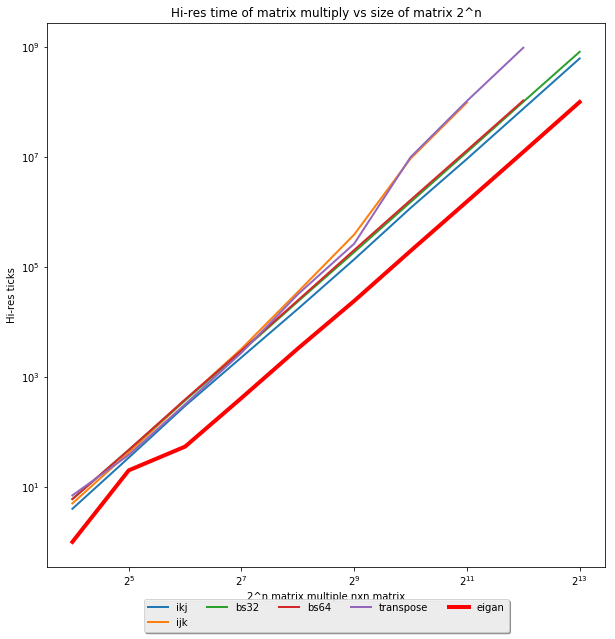

In [13]:
plt.subplots(1,1, figsize=(10, 10))
#plt.figure()


#for i in range(0, len(df)):
#    print df.iloc[i]['c1'], df.iloc[i]['c2']

for run in df.annotation.unique():
    plt.loglog(df.loc[df['annotation'] == run][['msize']], df.loc[df['annotation'] == run][['MMatrixtime']], label=run, basex=2, lw=2)

plt.loglog(df.loc[df['annotation'] == 'ikj'][['msize']], df.loc[df['annotation'] == 'ikj'][['eigantime']], color='red', label='eigan', basex=2, lw=4)

plt.legend(loc=9, ncol=5, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
plt.xlabel("2^n matrix multiple nxn matrix")
plt.ylabel("Hi-res ticks")
plt.title("Hi-res time of matrix multiply vs size of matrix 2^n")

plt.show()



# The 'eigan' line is why you should use the eigen libraries or something else that has been optimized for decades.